# Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut

- Nama: Fathur Rahman Al Farizy
- Email: fathur.alfarizy02@gmail.com
- Id Dicoding: fralfrzy

## Persiapan

### Menyiapkan library yang dibutuhkan

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib
from joblib import dump, load

### Menyiapkan data yang akan diguankan

In [3]:
df = pd.read_csv("data.csv",sep=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

## Data Preparation / Preprocessing

In [6]:
# Cek distribusi kelas target
print("Distribusi kelas target:")
df['Status'].value_counts()

Distribusi kelas target:


Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [12]:
# Encode target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Status_encoded'] = le.fit_transform(df['Status'])
df[['Status','Status_encoded']]

,Status,Status_encoded
0,Dropout,0
1,Graduate,2
2,Dropout,0
3,Graduate,2
4,Graduate,2
...,...,...
4419,Graduate,2
4420,Dropout,0
4421,Dropout,0
4422,Graduate,2


In [8]:
# Pisahkan fitur dan target
X = df.drop(['Status', 'Status_encoded'], axis=1)
y = df['Status_encoded']

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

In [10]:
# Identifikasi kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [24]:
numeric_features

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [16]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Modeling

In [17]:
# Buat pipeline dengan model Gradient Boosting
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [19]:
# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5]
}

grid_search = GridSearchCV(
    gb_pipeline, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_q...
       'Inflation_rate', 'GDP'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index([], dtype='object'))])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [20]:
# Model terbaik
best_model = grid_search.best_estimator_

# Simpan model
dump(best_model, 'student_success_model.joblib')
dump(le, 'label_encoder.joblib')

['label_encoder.joblib']

## Evaluation

In [21]:
# Prediksi
y_pred = best_model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Akurasi Model: 0.7627

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.81      0.74      0.77       284
    Enrolled       0.52      0.44      0.48       159
    Graduate       0.80      0.90      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.76      0.76      0.76       885



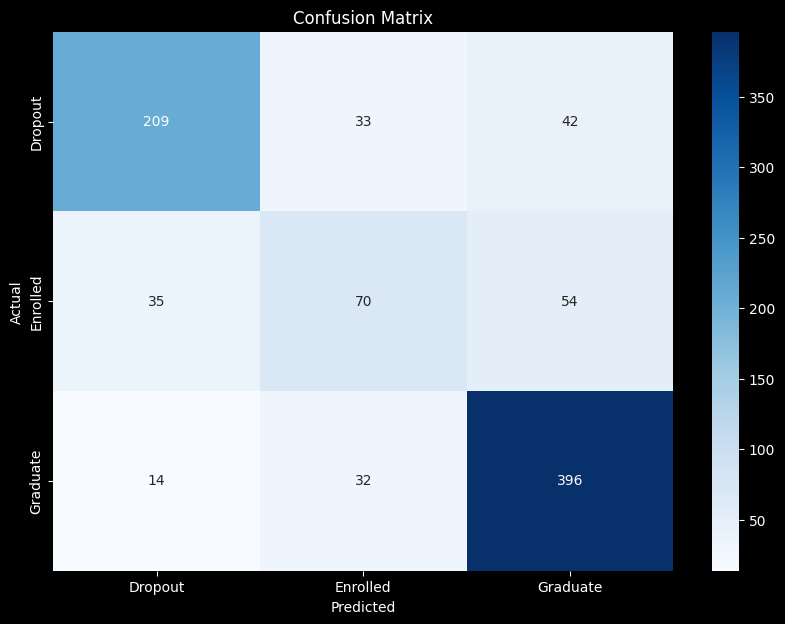

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

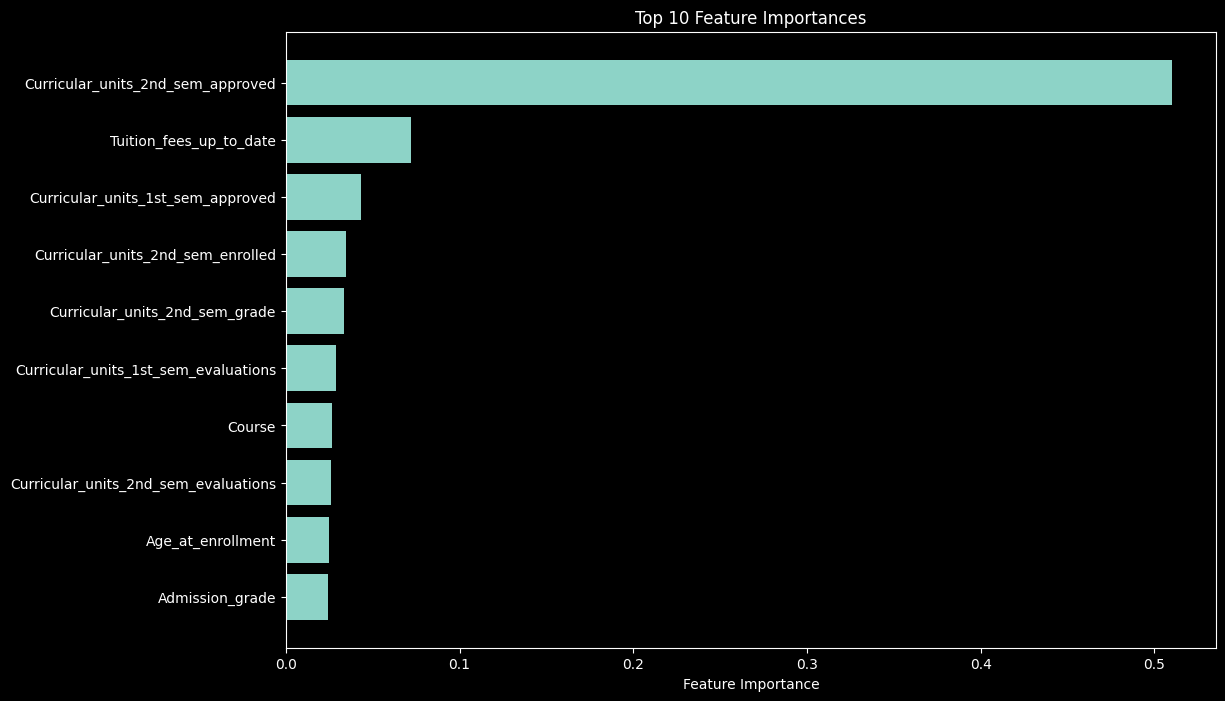

In [23]:
# Feature importance
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Dapatkan nama fitur setelah preprocessing
preprocessor = best_model.named_steps['preprocessor']
feature_names = numeric_features.tolist()

if len(categorical_features) > 0:
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    categorical_feature_names = ohe.get_feature_names_out(categorical_features)
    feature_names.extend(categorical_feature_names)

# Urutkan fitur berdasarkan kepentingan
sorted_idx = feature_importances.argsort()[::-1]
top_features = 10

plt.figure(figsize=(12, 8))
plt.barh(range(top_features), feature_importances[sorted_idx][:top_features], align='center')
plt.yticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.savefig('feature_importance.png')
plt.show()